In [17]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [18]:
df = pd.read_csv("online_retail.csv")
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [19]:
df = df[df['Quantity'] > 0].copy()
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']

In [20]:
mean_val = df["TotalPrice"].mean()
median_val = df["TotalPrice"].median()
mode_val = df["TotalPrice"].mode()[0]

print(f"Mean: {mean_val:.2f}, Median: {median_val:.2f}, Mode: {mode_val:.2f}")

Mean: 20.04, Median: 9.90, Mode: 15.00


In [21]:
def segment_customer(x):
    if x > mean_val:
        return 'High Spender'
    else:
        return 'Low Spender'

df['SpenderType'] = df['TotalPrice'].apply(segment_customer)
spender_groups = df.groupby('SpenderType')['TotalPrice'].agg(['mean', 'count']).reset_index()
print(spender_groups)

    SpenderType       mean   count
0  High Spender  70.895135  100307
1   Low Spender   8.198289  430978


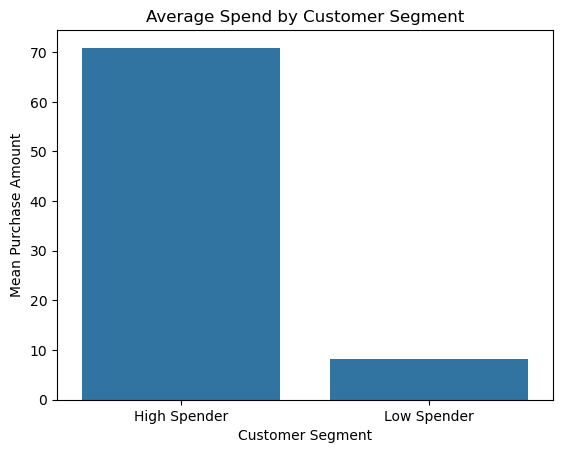

In [22]:
sns.barplot(data=spender_groups, x='SpenderType', y='mean')
plt.title('Average Spend by Customer Segment')
plt.ylabel('Mean Purchase Amount')
plt.xlabel('Customer Segment')
plt.show()